# A common and useful operation is to simplify the tracks to reduce their resolution. This can make the data much easier to work with because of the reduced size, but still maintain macroscopic patterns.

# This notebook shows a few different ways to do this in `trackio`.

In [48]:
import trackio as tio
import matplotlib.pyplot as plt

In [49]:
#create the Dataset
ds = tio.read(data_path='example00')

# Spatial and Temporal Resampling

## This is already covered here in notebook X

# Decimating Tracks

In [50]:
#get original track
track_id = ds.tracks.index[35]
original = ds.get_track(track_id)

#decimate track using the Douglas–Peucker algorithm
ds = ds.decimate_tracks(epsilon=10, tracks=[track_id])

#get decimated track
decimated = ds.get_track(track_id)

Decimating tracks: 100%|██████████| 1/1 [00:00<00:00, 30.77it/s]


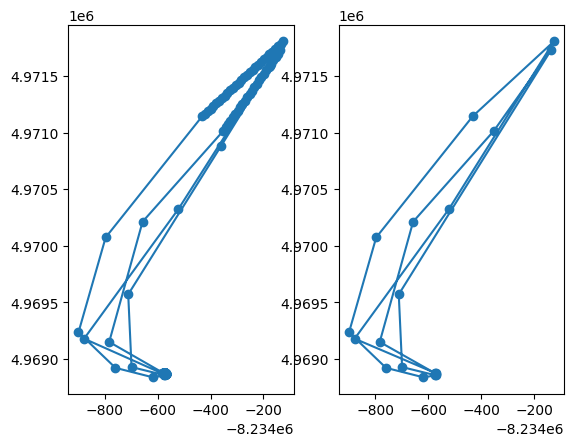

In [51]:
#plot the two
fig, ax = plt.subplots(1,2)
ax[0].plot(original['X'], original['Y'], '-o')
ax[1].plot(decimated['X'], decimated['Y'], '-o')

# Notice the reduction in size and overall similarity between the two.

In [52]:
len(original), len(decimated)

(1422, 19)

# Characteristic Points

## This method uses a slightly modified version of the algorithm outlined here (Natalia Andrienko and Gennady Andrienko, 2010): http://geoanalytics.net/and/papers/tvcg11.pdf

In [53]:
#get original track
track_id = ds.tracks.index[30]
original = ds.get_track(track_id)

#reduce track to characteristic points
ds = ds.characteristic_tracks(stop_threshold=0.15,
                              turn_threshold=10,
                              min_distance=100,
                              max_distance=1000,
                              min_stop_duration=1800,
                              tracks=[track_id],
                              inplace=True)

#get characteristic track
characteristic = ds.get_track(track_id)

Extracting characteristic tracks: 100%|██████████| 1/1 [00:00<00:00, 30.77it/s]


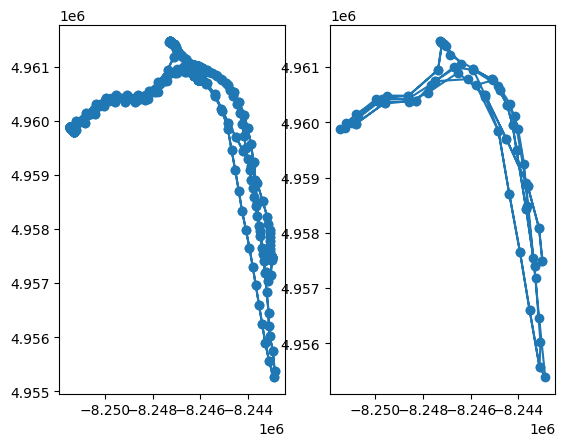

In [54]:
#plot the two
fig, ax = plt.subplots(1,2)
ax[0].plot(original['X'], original['Y'], '-o')
ax[1].plot(characteristic['X'], characteristic['Y'], '-o')

# Again, notice the difference in size.

In [55]:
len(original), len(characteristic)

(2269, 93)

# Simpifying Stops

In [56]:
#get original track
track_id = 'Vessel_368139280_T0'
original = ds.get_track(track_id)

#simplify stops
ds = ds.simplify_stops(stop_threshold=0.15,
                       min_stop_duration=1800,
                       max_drift_distance=500,
                       tracks=[track_id])

#get simplified track
simple = ds.get_track(track_id)

Simplifying stops along tracks: 100%|██████████| 1/1 [00:00<00:00, 80.58it/s]


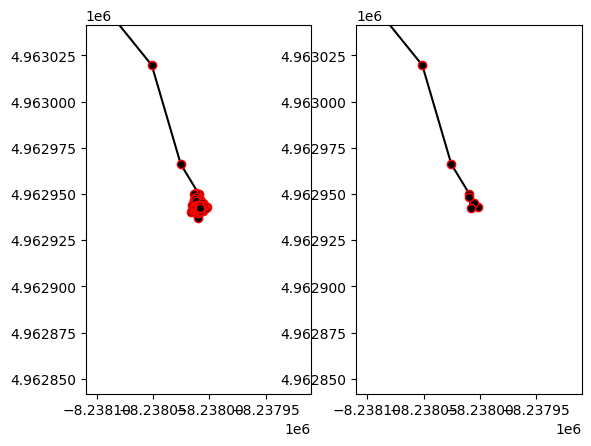

In [57]:
#plot the two
fig, ax = plt.subplots(1,2)

ax[0].plot(original['X'], original['Y'], '-o', c='k', markeredgecolor='r')
ax[1].plot(simple['X'], simple['Y'], '-o', c='k', markeredgecolor='r')

center = -8238009.76, 4962941.75
for a in ax:
    a.set_xlim(center[0]-100, center[0]+100)
    a.set_ylim(center[1]-100, center[1]+100)

# Notice the rest of the track has remained untouched, but the stop has been simplified.

In [58]:
len(original), len(simple)

(928, 59)